# 1. 형태소분석 개요

### konlpy: 쉽고 간결한 한국어 정보처리 파이썬 패키지
- 형태소 : 의미를 가지는 최소한의 단위

In [1]:
from konlpy.tag import Kkma

kkma = Kkma()

In [2]:
kkma.sentences("한국어 분석을 시작합니다 재미있어요~~")  # 문장분석(마침표가 없어도 문장으로 구분 가능)

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns("한국어 분석을 시작합니다 재미있어요~~")  # 명사분석

['한국어', '분석']

In [4]:
kkma.pos("한국어 분석을 시작합니다 재미있어요~~")  # 태그를 붙이는 형태소 분석

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

---

In [5]:
from konlpy.tag import Hannanum

han = Hannanum()

In [6]:
han.nouns("한국어 분석을 시작합니다 재미있어요~~")  # 명사분석

['한국어', '분석', '시작']

In [7]:
han.morphs("한국어 분석을 시작합니다 재미있어요~~")  # 태그를 붙이지 않는 형태소 분석

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
han.pos("한국어 분석을 시작합니다 재미있어요~~")   # 태그를 붙이는 형태소 분석

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

---

In [16]:
from konlpy.tag import Okt  # 옛날에는 Twitter

okt = Okt()

In [17]:
okt.nouns("한국어 분석을 시작합니다 재미있어요~~")  # 명사분석

['한국어', '분석', '시작']

In [18]:
okt.morphs("한국어 분석을 시작합니다 재미있어요~~")  # 태그를 붙이지 않는 형태소 분석

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [19]:
okt.pos("한국어 분석을 시작합니다 재미있어요~~")   # 태그를 붙이는 형태소 분석

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

---
# 2. 워드클라우드(이상한 나라의 앨리스)
- STOPWORDS : 영어에서만 사용 / 중요하지 않은 영어를 제거하는 모듈

### (1)
- 앨리스 소설 & 그림파일 읽어오기
- 본문에서 많이 등장하는 said는 stopword 처리

In [21]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [26]:
text = open('../data/alice.txt').read()
print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without picture

In [23]:
alice_mask = np.array(Image.open('../data/06_alice_mask.png'))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [27]:
stopwords = set(STOPWORDS)
stopwords.add('said')
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [28]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()
rc("font", family = "Malgun Gothic")

%matplotlib inline

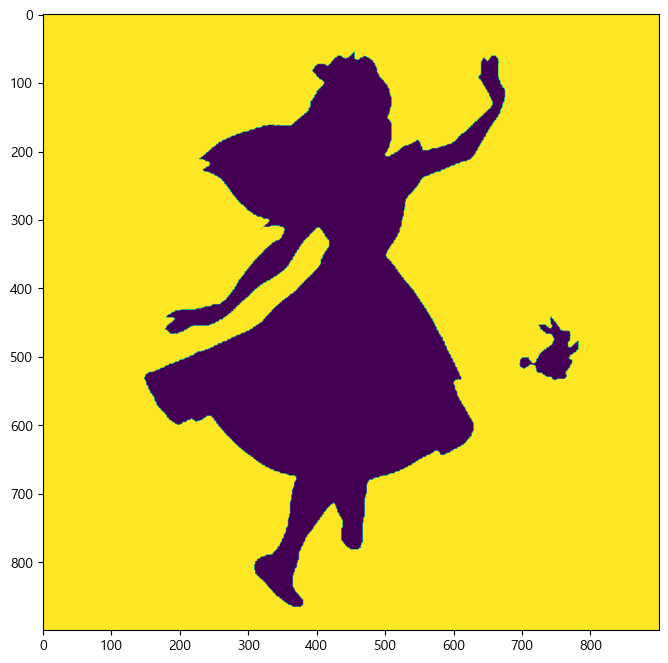

In [32]:
# 그림 출력
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, interpolation='bilinear')
plt.show()

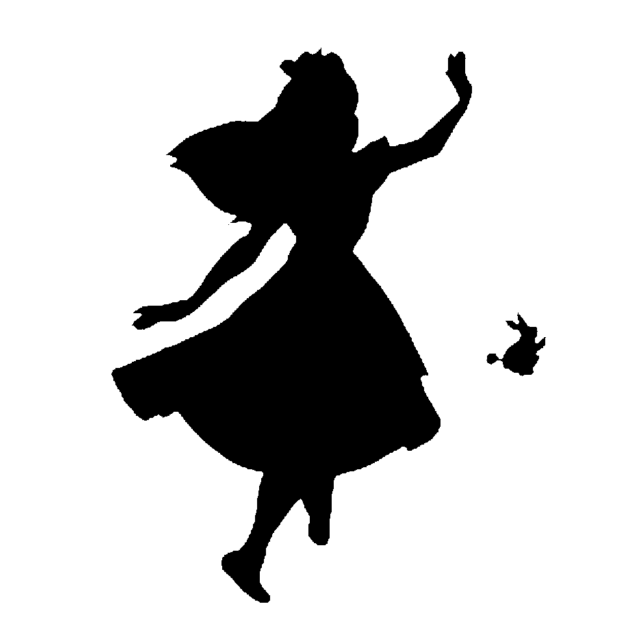

In [31]:
# 그림 출력
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

### (2) WordCloud 사용
- WordCloud 모듈은 자체적으로 단어를 추출해 빈도수를 조사하고 정규화하는 기능을 제공
- max_words : 최대 표현 단어 개수

In [33]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)

In [34]:
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

- 'Alice' 단어의 발생빈도가 1.0 일 때 다른 단어들의 **상대적** 발생빈도 값

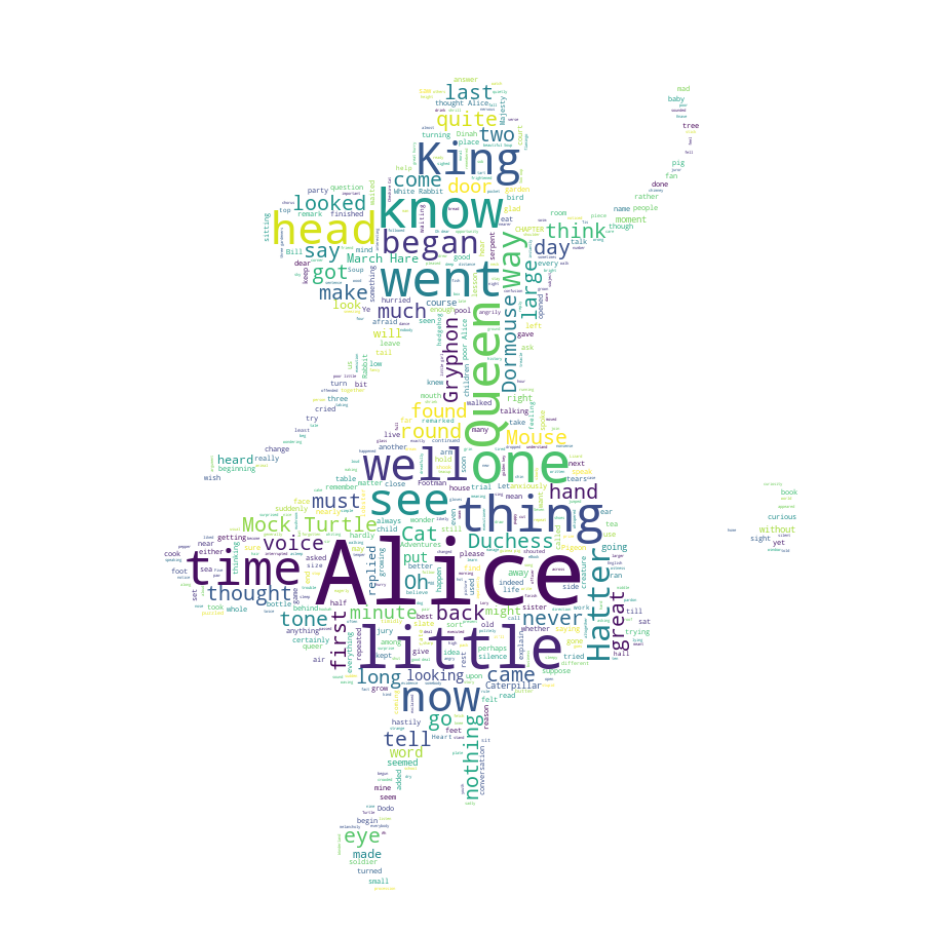

In [35]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

---
# 3. 워드클라우드(스타워즈)

In [37]:
text2 = open('../data/06_a_new_hope.txt').read()

text2 = text2.replace('HAN', 'Han')
text2 = text2.replace("LUKE'S", 'LUKE')

mask = np.array(Image.open('../data/06_stormtrooper_mask.png'))

In [38]:
stopwords.add('int')
stopwords.add('ext')

In [39]:
wc = WordCloud(max_font_size=1000, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text2)

default_colors = wc.to_array()

In [40]:
default_colors

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [41]:
# 그레이톤으로 그리기 위해 색상함수를 정의 (WordCloud 에서 만든 함수)

import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

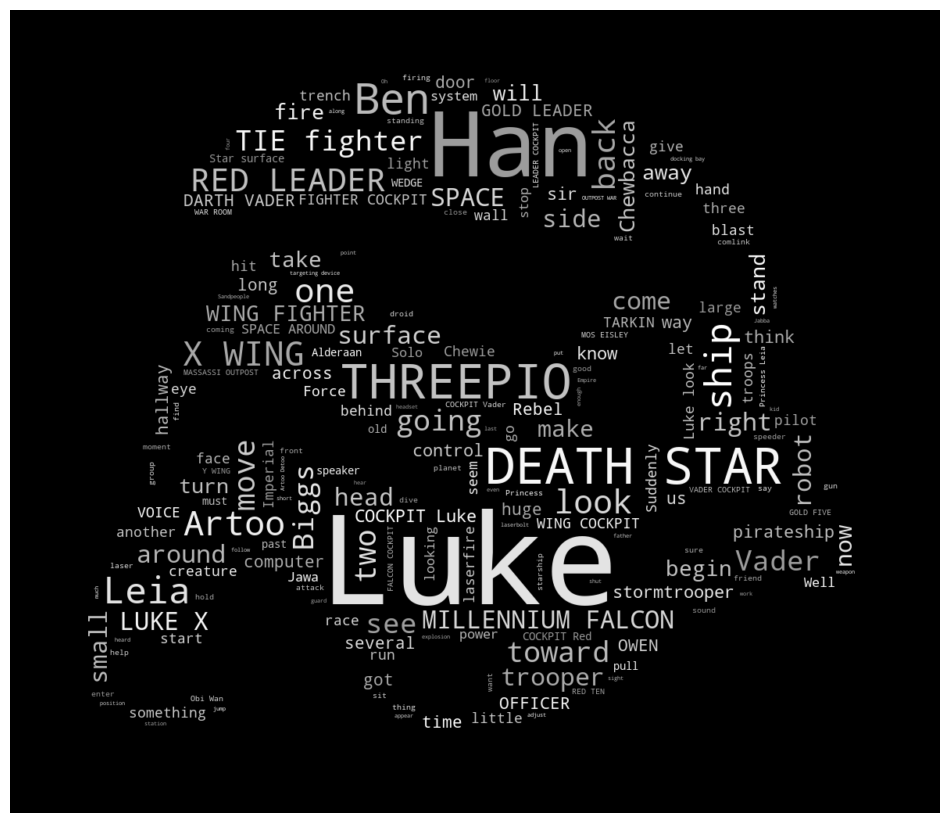

In [43]:
plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=13), interpolation='bilinear')
plt.axis("off")
plt.show()

---
# 3. 육아휴직관련법안 분석
- konlpy 는 대한민국 법령을 갖고 있다.


### (1) 데이터 불러오기

In [48]:
import nltk
from konlpy.corpus import kobill

doc_ko = kobill.open('1809890.txt').read()
print(doc_ko)

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).

- 1 -

법률  제        호

지방공무원법 일부개정법률안

지방공무원법 일부를 다음과 같이 개정한다.

제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제63조(휴직) ① (생  략)

제63조(휴직) ① (현행과 같음)

  ② 공무원이 다음 각 호의 어

  ② -------------------------

느 하나에 해당하는 사유로 휴

----------------------------

직을 원하면 임용권자는 휴직

----------------------------

을 명할 수 있다. 다만, 제4호

-------------.---------------

의 경우에는 대통령령으로 정

----------------------------

하는 특별한 사정이 없으면 휴

----------------------------

직을 명하여야 한다.

--------------.

  1. ∼ 3.

In [49]:
from konlpy.tag import Okt

okt = Okt()
tokens_ko = okt.nouns(doc_ko)  # 명사분석
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

### (2) nltk 를 사용해 토근 분석 (빈도수 포함)

In [54]:
ko = nltk.Text(tokens_ko, name='육아휴직법')
ko

<Text: 육아휴직법>

In [51]:
# 토큰 개수

print(len(ko.tokens))

735


In [52]:
# 토큰 개수(중복제거)

print(len(set(ko.tokens)))

250


In [53]:
# 토큰 빈도수

ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

### (3) 빈도수를 그래프로 표현

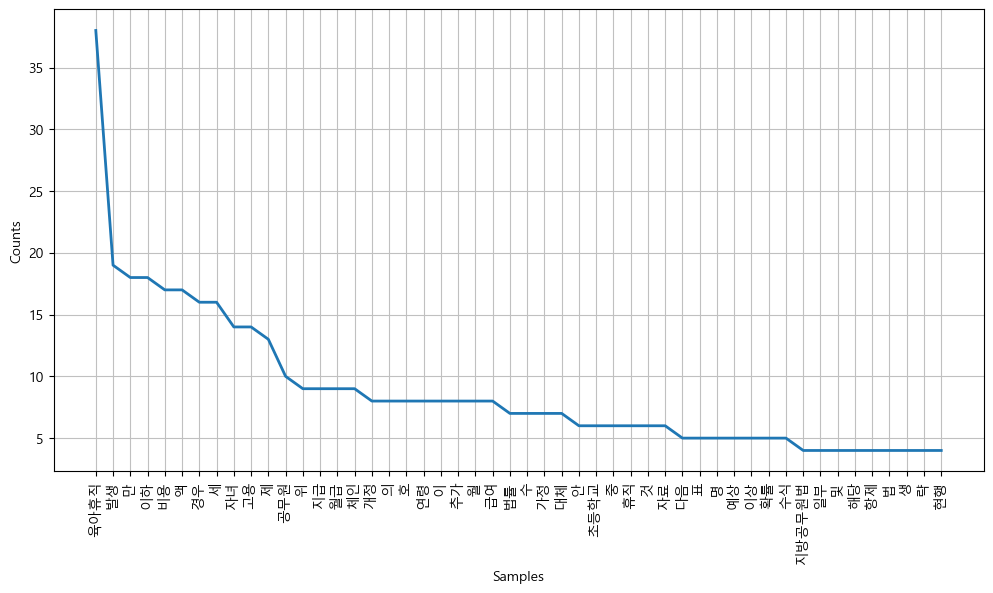

In [56]:
plt.figure(figsize=(12, 6))
ko.plot(50)   # 상위 50개만
plt.show()

### (4) stopwords 생성
- 한글은 복잡해서 stopwords를 직접 생성

In [57]:
stop_words = ['.', "(", ")", ",", "'", "%", "-", "X", ").", 'x', "의", "자", 
              "에", "안", "번", "호", "을","이","다", "만", "로", "가", "를"]

In [58]:
ko = [each_word for each_word in ko if each_word not in stop_words]  #stop_words 에 없는 단어만 추출
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

### (5) 다시 그래프

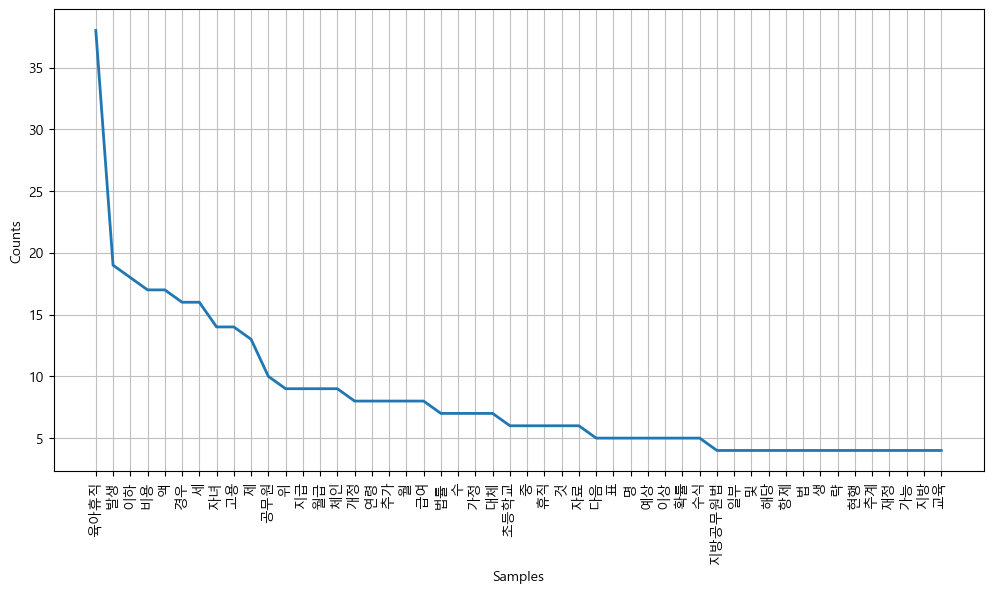

In [60]:
ko = nltk.Text(ko, name='육아휴직법')

plt.figure(figsize=(12, 6))
ko.plot(50)   # 상위 50개만
plt.show()

### (6) 특정 단어의 빈도수 조사

In [62]:
ko.count("초등학교")

6

### (7) 단어의 문서 내 위치 시각화

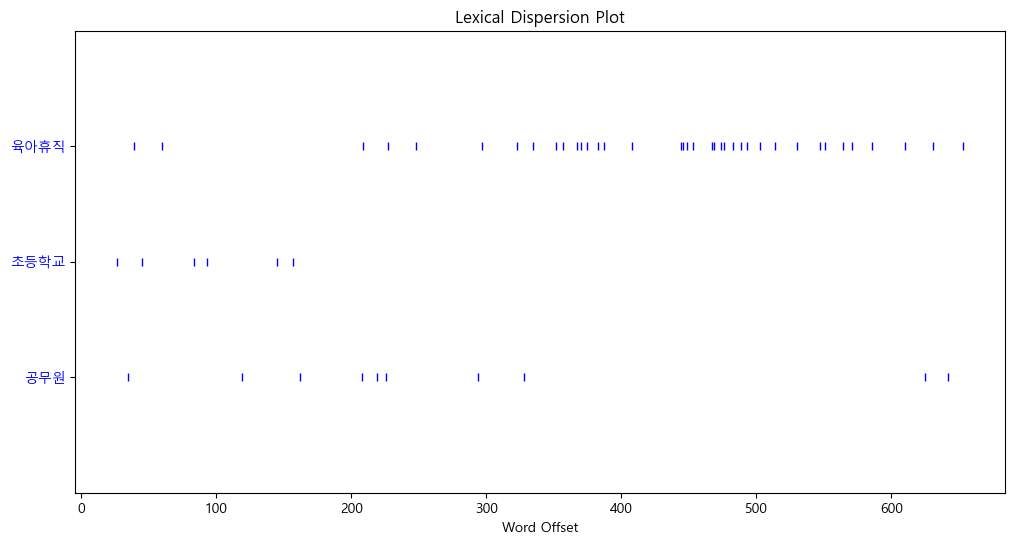

In [63]:
plt.figure(figsize=(12, 6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

### (8) 단어의 문맥 파악

In [64]:
ko.concordance("초등학교")

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


### (9) 연어(連語)
- 연관 있는 단어들

In [65]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


### (10) WordCloud

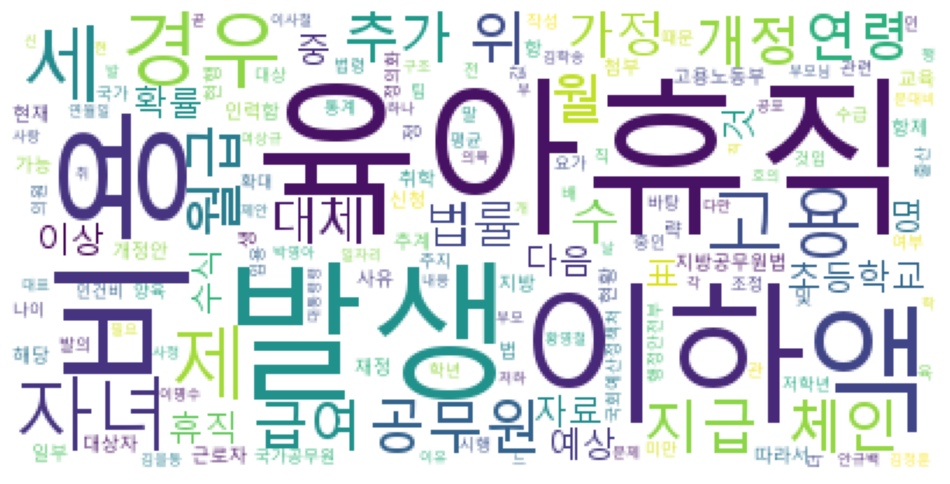

In [68]:
data = ko.vocab().most_common(150)  

wordcloud = WordCloud(font_path=f_path, relative_scaling=0.2,
                      background_color="white").generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- most_common 가장 많이 등장한 단어 150개
- relative_scaling : 단어들 사이의 간격
- generate_from_frequencies: 자주 등장한 단어들로